In [14]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [15]:
class Node():
    def __init__(self, key, value):
        self.key = key
        self.value = value
        self.parent = None
        self.left_child = None
        self.right_child = None 
        
        
    #### FOR TESTING ####
    
    def get_key(self): 
        return self.key
    
    def get_parent(self): #FOR TESTING
        return self.parent.get_key()
    
    def get_left(self):
        return self.left_child.get_key()
    
    def get_right(self):
        return self.right_child.get_key()

In [26]:
class ScapegoatTree:
    def __init__(self):
        self.root = None
        self.size = 0

    def insert(self, key, value):
        node_to_insert = Node(key, value)
        
        # BASE CASE TO COVER IF THERE IS NOTHING IN THE TREE
        if self.root is None:
            self.root = Node(key, value)
            self.size += 1
            return
        
        try:
            self.update(key, value)
            
        except KeyError:
        #Use BS to find the node's correct place at the bottom of the tree: 
            this_node = self.root
            while this_node is not None:
                temp = this_node
                if node_to_insert.key < this_node.key:
                    this_node = this_node.left_child
                else:
                    this_node = this_node.right_child
            self.size += 1


            # reassign pointers 
            node_to_insert.parent = temp
            if node_to_insert.key < node_to_insert.parent.key:
                node_to_insert.parent.left_child = node_to_insert
            else:
                node_to_insert.parent.right_child = node_to_insert
            node_to_insert.left_child = None
            node_to_insert.right_child = None

            scapegoat = self.find_scapegoat(node_to_insert)
            if scapegoat is None:
                return

            new_sub_root = self.rebalance(scapegoat)

            #Assign the correct pointers to and from scapegoat
            scapegoat.left_child = new_sub_root.left_child
            scapegoat.right_child = new_sub_root.right_child
            scapegoat.key = new_sub_root.key
            scapegoat.value = new_sub_root.value
            scapegoat.left_child.parent = scapegoat
            scapegoat.right_child.parent = scapegoat
            
    def update(self, key, value):
        node = self.search(key)
        node.value = value
        
    def search(self, key):
        return self.recursive_search(self.root, key)
    
    def recursive_search(self, sub_root, key):
        if sub_root.key == key:
            return sub_root
        else:
            if key < sub_root.key:
                if sub_root.left_child is None:
                    raise KeyError
                else:
                    return self.recursive_search(sub_root.left_child, key)
            else:
                if sub_root.right_child is None:
                    raise KeyError
                else:
                    return self.recursive_search(sub_root.right_child, key)

    def find_scapegoat(self, node):
        if node == self.root:
            return None
        while self.is_balanced(node):
            if node == self.root:
                return None
            node = node.parent 
        return node

    def is_balanced(self, node):
        node_size = self.subtree_size(node.left_child) - self.subtree_size(node.right_child)
        if node_size <= 1 and node_size >= -1:
            return True
        return False
 
    def subtree_size(self, node):
        #recursively calculates the size of the subtree of an input node 
        if node == None:
            return 0
        return self.subtree_size(node.left_child) + self.subtree_size(node.right_child) + 1 

    def rebalance(self, root):
        
        global numberRotations
        numberRotations += 1
        
        def make_flat(node, nodes):
            if node == None:
                return
            make_flat(node.left_child, descendants)
            descendants.append(node)
            make_flat(node.right_child, descendants)

        def rebuild(descendants, start, end):
            # build a BST from a sorted list 
            # base case: 
            if start > end:
                return None
            
            middle = int(math.ceil(start + (end - start) / 2.0))
            node = Node(descendants[middle].key, descendants[middle].value)
            
            # recursively reassign pointers
            node.left_child = rebuild(descendants, start, middle-1)
            if node.left_child is not None:
                node.left_child.parent = node  
            node.right_child = rebuild(descendants, middle+1, end)
            if node.right_child is not None:
                node.right_child.parent = node 
            return node

        descendants = []
        make_flat(root, descendants)
        return rebuild(descendants, 0, len(descendants)-1)

In [22]:
def timeTrial(n):
    import random 
    import time
    listVal = []
    tree = ScapegoatTree()

    for nodes in range(n):
        listVal.append(nodes)

    random.shuffle(listVal)

    timeStart = time.time()

    for y in listVal:
        #print("Add",y)
        tree.insert(y, y)
        
    timeEnd = time.time()
    #print("size",tree.size)
    return [ (timeEnd - timeStart), tree]
    
def searchTrial(theTree,numNodes):
    import time
    timeStart = time.time()
    
    for x in range(numNodes):
        #print (x)
        theTree.search(x)
    
    timeEnd = time.time()
    
    return timeEnd - timeStart

3
10
30
100
300
1000
3000
10000
15000
20000
25000
30000


Text(0.5, 0, 'Number of n in the Tree')

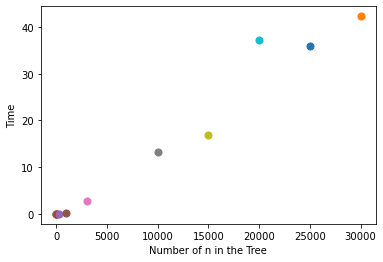

In [30]:
listOfNodes = [3,10,30,100,300,1000,3000,10000,15000,20000,25000,30000]
listOfNumberRotations = []
listOfNodesSize = []
listOfSpaceNeeded = []
listOfSearchTimes = []


for numNodes in listOfNodes:
    print (numNodes)
    
    for numberTrials in range(50):
        numberRotations = 0
        trial = timeTrial( numNodes )
        
        timeInsert, theTree = trial
        
        timeSearch = searchTrial(theTree,numNodes)
        listOfSearchTimes.append(timeSearch)
        
        listOfNumberRotations.append(numberRotations)
        listOfNodesSize.append(numNodes)
        
        plt.scatter( numNodes ,timeInsert,50)
        

plt.ylabel("Time")
plt.xlabel("Number of n in the Tree")

Text(0.5, 0, 'Number of n in the Tree')

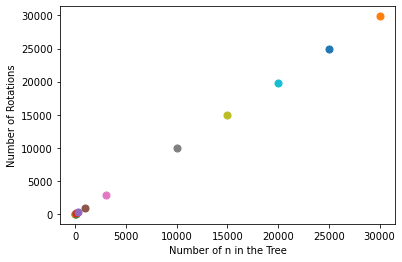

In [31]:
for x in range( len( listOfNumberRotations ) ):
    plt.scatter( listOfNodesSize[x], listOfNumberRotations[x], 50)
    
plt.ylabel("Number of Rotations")
plt.xlabel("Number of n in the Tree")

Text(0.5, 0, 'Number of n in the Tree')

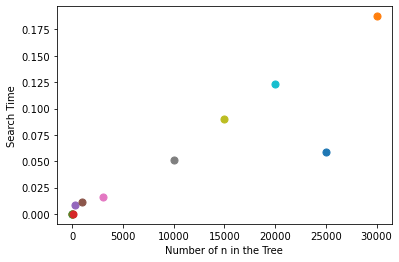

In [32]:
for x in range( len( listOfSearchTimes ) ):
    plt.scatter( listOfNodesSize[x], listOfSearchTimes[x], 50 )
    
plt.ylabel("Search Time")
plt.xlabel("Number of n in the Tree")

In [5]:
def my_tree_to_nx_graph(tree):
    graph = nx.Graph()
    queue = [tree.root]
    while len(queue) > 0:
        new_node = queue.pop(0)
        
        graph.add_node(new_node.key, label=new_node.value)
        if new_node.parent is not None:
            graph.add_edge(new_node.key, new_node.parent.key)
        if new_node.left_child is not None:
            queue.append(new_node.left_child)
        if new_node.right_child is not None:
            queue.append(new_node.right_child)
    return graph

In [6]:
import networkx as nx

In [7]:
my_bst_graph = my_tree_to_nx_graph(tree)

AttributeError: 'NoneType' object has no attribute 'key'

In [8]:
labels = nx.get_node_attributes(my_bst_graph, 'label') 
nx.draw(my_bst_graph, labels=labels)

NameError: name 'my_bst_graph' is not defined